## Iris鸢尾花分类
KNN中，用10折交叉验证寻找最佳的K

In [1]:
import pandas as pd
import numpy as np

#KNN
from sklearn.neighbors import KNeighborsClassifier

# 模型性能的评价,本案例为分类问题，用正确率作为模型性能评价指标
from sklearn.metrics import accuracy_score 

#作图
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
#读取数据
# csv文件没有列名，增加列名
feat_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

dpath = "./data/"
df = pd.read_csv(dpath + "iris.csv", names = feat_names)

#通过观察前5行，了解数据每列（特征）的概况
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 数据总体信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
#查看缺失值情况（每列缺失情况从上述info()函数亦可知道）
#isnull()函数返回dataframe表中的每个元素是否缺失（df中每一个值都为False或者True）
#df.isnull()

# 计算每一行有多少个缺失值的值，即按行统计缺失值
row_null = df.isnull().sum(axis=1) 

# 按列统计缺失值
col_null = df.isnull().sum(axis=0)

#统计整个df的缺失值
all_null = df.isnull().sum().sum()

In [5]:
#数值型特征的统计量
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


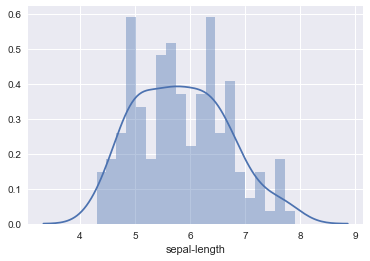

In [6]:
#特征的直方图
sns.distplot(df['sepal-length'], bins=20, kde=True)

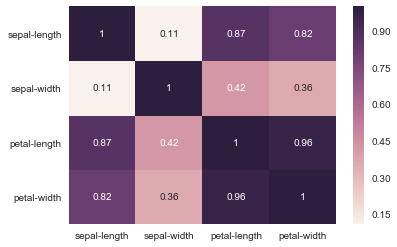

In [7]:
corr = df.corr().abs()
sns.heatmap(corr,annot=True)

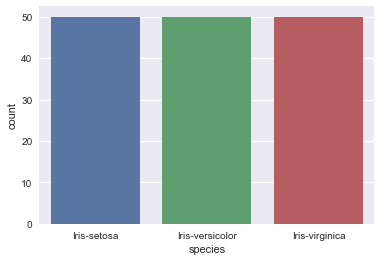

In [8]:
#标签的直方图
sns.countplot(df['species'])

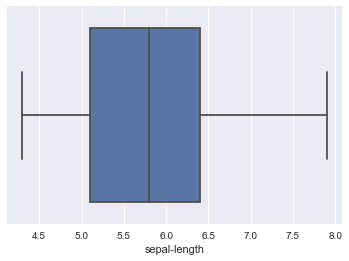

In [9]:
#IQR,检测噪声
sns.boxplot(df['sepal-length'])

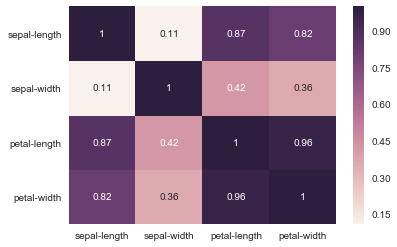

In [10]:
#数值型特征之间的相关系数
feat_corr = df.corr().abs()
sns.heatmap(feat_corr , annot=True)

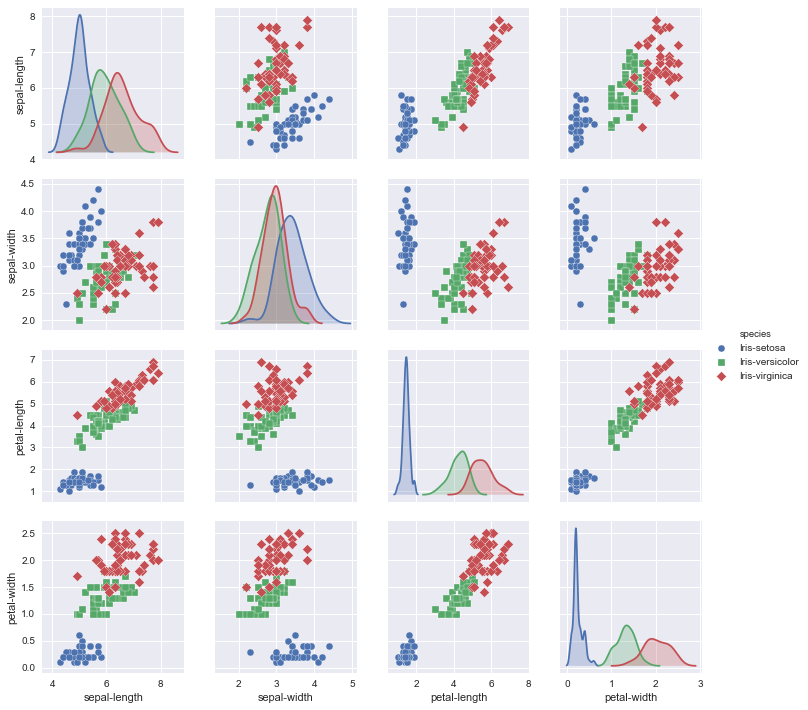

In [11]:
# 通过hue设定种类，markers不同种类的点的表示方式
# 对角线为核密度图
sns.pairplot(df, kind="scatter", diag_kind = "kde", hue="species", markers=["o", "s", "D"], diag_kws=dict(shade=True))

In [12]:
#标签字符串映射为整数（在此并不一定需要）
target_map = {'Iris-setosa':0, 
              'Iris-versicolor':1,
              'Iris-virginica':2 }  #2

# Use the pandas apply method to numerically encode our attrition target variable
df['species'] = df['species'].apply(lambda x: target_map[x])

In [13]:
# 从原始数据中分离输入特征x和输出y
y = df['species']
X = df.drop('species', axis = 1)

In [14]:
# 特征缩放:数据标准化
from sklearn.preprocessing import StandardScaler

#模型训练
scaler = StandardScaler()
scaler.fit(X)

#特征缩放
X = scaler.transform(X)
#X_test = scaler.transform(X_test)

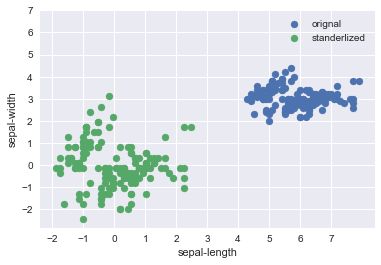

In [15]:
plt.scatter(df['sepal-length'],  df['sepal-width'], label = 'orignal')
plt.scatter(X[:,0],  X[:,1], label = 'standerlized')

x_ticks = np.arange(-2, 8, 1)
plt.xticks(x_ticks)
plt.yticks(x_ticks)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.legend()
plt.show()

In [16]:
#将数据分割训练数据与测试数据
#分类数据，跳用分层采样
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试集，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, stratify=y ) 

## 采用5折交叉验证评估给定单个超参数模型的性能

In [17]:
from sklearn.model_selection import cross_val_score

#训练分类器
knn = KNeighborsClassifier(n_neighbors = 3)

scores = cross_val_score(knn, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validaton score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.95238095  0.94871795  1.        ]
Average cross-validaton score: 0.97


### 10折交叉验证

In [18]:
from sklearn.model_selection import GridSearchCV

#设置超参数搜索范围
Ks = range(1, 31, 2)
tuned_parameters = dict(n_neighbors = Ks)

#生成学习器实例
knn = KNeighborsClassifier()

#生成GridSearchCV实例
grid= GridSearchCV(knn, tuned_parameters,cv=10, scoring='accuracy',n_jobs = 4, verbose=2)

#训练，交叉验证对超参数调优
grid.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] .........

[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [19]:
best_parameter = grid.best_params_['n_neighbors']
best_parameter

3

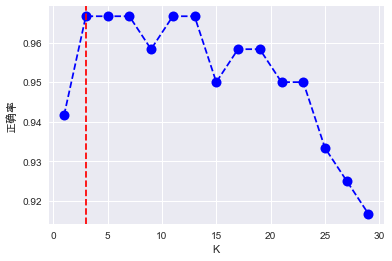

In [20]:
# plot CV误差曲线
accuracy = grid.cv_results_[ 'mean_test_score' ]

plt.plot(Ks, accuracy, color='b', linestyle='dashed', marker='o',
         markerfacecolor='b', markersize=10)

#最佳超参数
plt.axvline(best_parameter, color='r', ls='--')

plt.xlabel(u'K')
plt.ylabel(u'正确率')

In [21]:
accuracy

array([ 0.94166667,  0.96666667,  0.96666667,  0.96666667,  0.95833333,
        0.96666667,  0.96666667,  0.95      ,  0.95833333,  0.95833333,
        0.95      ,  0.95      ,  0.93333333,  0.925     ,  0.91666667])

In [22]:
accuracy[int(best_parameter/2)]

0.96666666666666667

In [23]:
#测试集上测试
y_test_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)
acc

0.96666666666666667

## 取前2维特征，在2D平面上可视化决策边界

In [24]:
#用所用的数据做训练
X_train = X
y_train = y

#取前2维特征
X_train_2d = X_train[:, :2] 

#训练分类器
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_2d, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
#画出分类器的决策边界
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    
    x1_min, x2_min = X.min(axis=0) - eps
    x1_max, x2_max = X.max(axis=0) + eps
   
    x1 = np.linspace(x1_min, x1_max, 500)
    x2 = np.linspace(x2_min, x2_max, 500)

    # 生成网格采样点
    X1, X2 = np.meshgrid(x1, x2)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(())
    ax.set_yticks(())

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


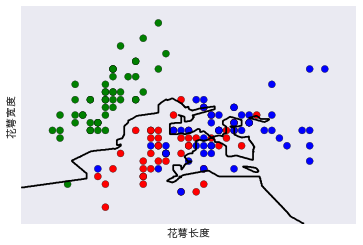

In [26]:
import matplotlib as mpl
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
#marks = ['o','^','v']
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c = y_train, cmap=cm_dark,marker='o', edgecolors='k')

plot_2d_separator(knn, X_train_2d) # plot the boundary

#plt.xlabel(df.columns[0])
#plt.ylabel(df.columns[1])
plt.xlabel(u'花萼长度')
plt.ylabel(u'花萼宽度')
plt.legend()
plt.show()